# Setup

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
bounds_AS = [68,79,4,20]
bounds_BoB = [87,100,0,23]
bounds_plt = [65,100,0,30]

# Read Data

In [3]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
ds_SLA


<xarray.Dataset>
Dimensions:           (lat: 35, lon: 55, month: 12)
Coordinates:
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon               (lon) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * lat               (lat) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
Data variables:
    mon_sla_mon_clim  (month, lat, lon) float64 ...

In [4]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_cp.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12)
Coordinates:
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    tcp                          (month, lat, lon) float64 ...
    ocp                          (month, lat, lon) float64 ...
    tcp_thresh_20                (month, lat, lon) float64 ...
    ocp_thresh_50                (month, lat, lon) float64 ...
    tcp_thresh_23                (month, lat, lon) float64 ...
    ocp_thresh_100               (month, lat, lon) float64 ...
    tcp_thresh_25                (month, lat, lon) float64 ...
    ocp_th

# Whole Indian Ocean Scatterplots

Text(0, 0.5, 'tcp')

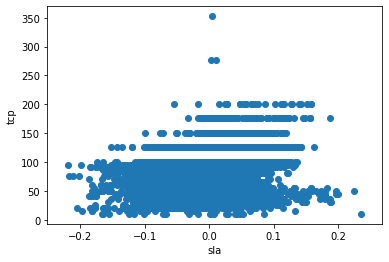

In [5]:
sla = ds_SLA.mon_sla_mon_clim.stack(allpoints=['month','lat','lon'])
tcp = ds_WOA.tcp.stack(allpoints=['month','lat','lon'])
ocp = ds_WOA.ocp.stack(allpoints=['month','lat','lon'])

plt.scatter(sla,tcp)
plt.xlabel('sla')
plt.ylabel('tcp')
# plt.ylim([0,150])

Text(0, 0.5, 'ocp')

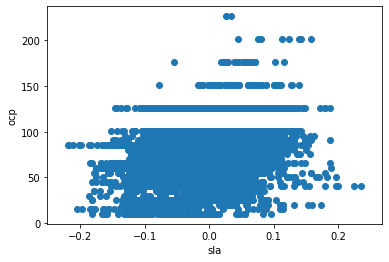

In [6]:
plt.scatter(sla,ocp)
plt.xlabel('sla')
plt.ylabel('ocp')

In [7]:
#subset these for the AS and BoB
# compare to threshold method?
# maybe this isn't necessray...but I think it's important since the signal is stronger in the BoB
# also mention the values of the OMZ levels are different (AS is lower than BoB)

# Subset for AS and BoB

In [48]:
#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
tcp_AS = ds_WOA.tcp.sel(lat = lat_slice_AS, lon = lon_slice_AS)
ocp_AS = ds_WOA.ocp.sel(lat = lat_slice_AS, lon = lon_slice_AS)
sla_AS = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_AS, lon = lon_slice_AS)
    
# convert to coastal
xx,yy = np.meshgrid(np.array(tcp_AS.lon),np.array(tcp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
tcp_AS = tcp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
ocp_AS = ocp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
sla_AS = sla_AS.stack(allpoints=['lat','lon'])[:,mask_AS]

mon_AS = np.full(tcp_AS.shape,np.nan)
for tt in range(1,13):
    mon_AS[tt-1,:] = np.ones([1,tcp_AS.shape[1]])*tt
    
tcp_AS = np.array(tcp_AS).flatten()
ocp_AS = np.array(ocp_AS).flatten()
sla_AS = np.array(sla_AS).flatten()
mon_AS = mon_AS.flatten()

#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
tcp_BoB = ds_WOA.tcp.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
ocp_BoB = ds_WOA.ocp.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
sla_BoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# # remove andaman and nicobar 
ind = (ds_WOA.lon >91) & (ds_WOA.lon <94.5)& (ds_WOA.lat >6) & (ds_WOA.lat <14)
tcp_BoB = tcp_BoB.where(~ind)
ocp_BoB = ocp_BoB.where(~ind)
sla_BoB = sla_BoB .where(~ind)

# convert to coastal
xx,yy = np.meshgrid(np.array(tcp_BoB.lon),np.array(tcp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
tcp_BoB = tcp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
ocp_BoB = ocp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
sla_BoB = sla_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]

mon_BoB = np.full(tcp_BoB.shape,np.nan)
for tt in range(1,13):
    mon_BoB[tt-1,:] = np.ones([1,tcp_BoB.shape[1]])*tt

# fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(4,6),dpi=200)
    
# plt.scatter(xx_BoB,yy_BoB, c = tcp_BoB[0,:])
    
tcp_BoB = np.array(tcp_BoB).flatten()
ocp_BoB = np.array(ocp_BoB).flatten()
sla_BoB = np.array(sla_BoB).flatten()
mon_BoB = mon_BoB.flatten()


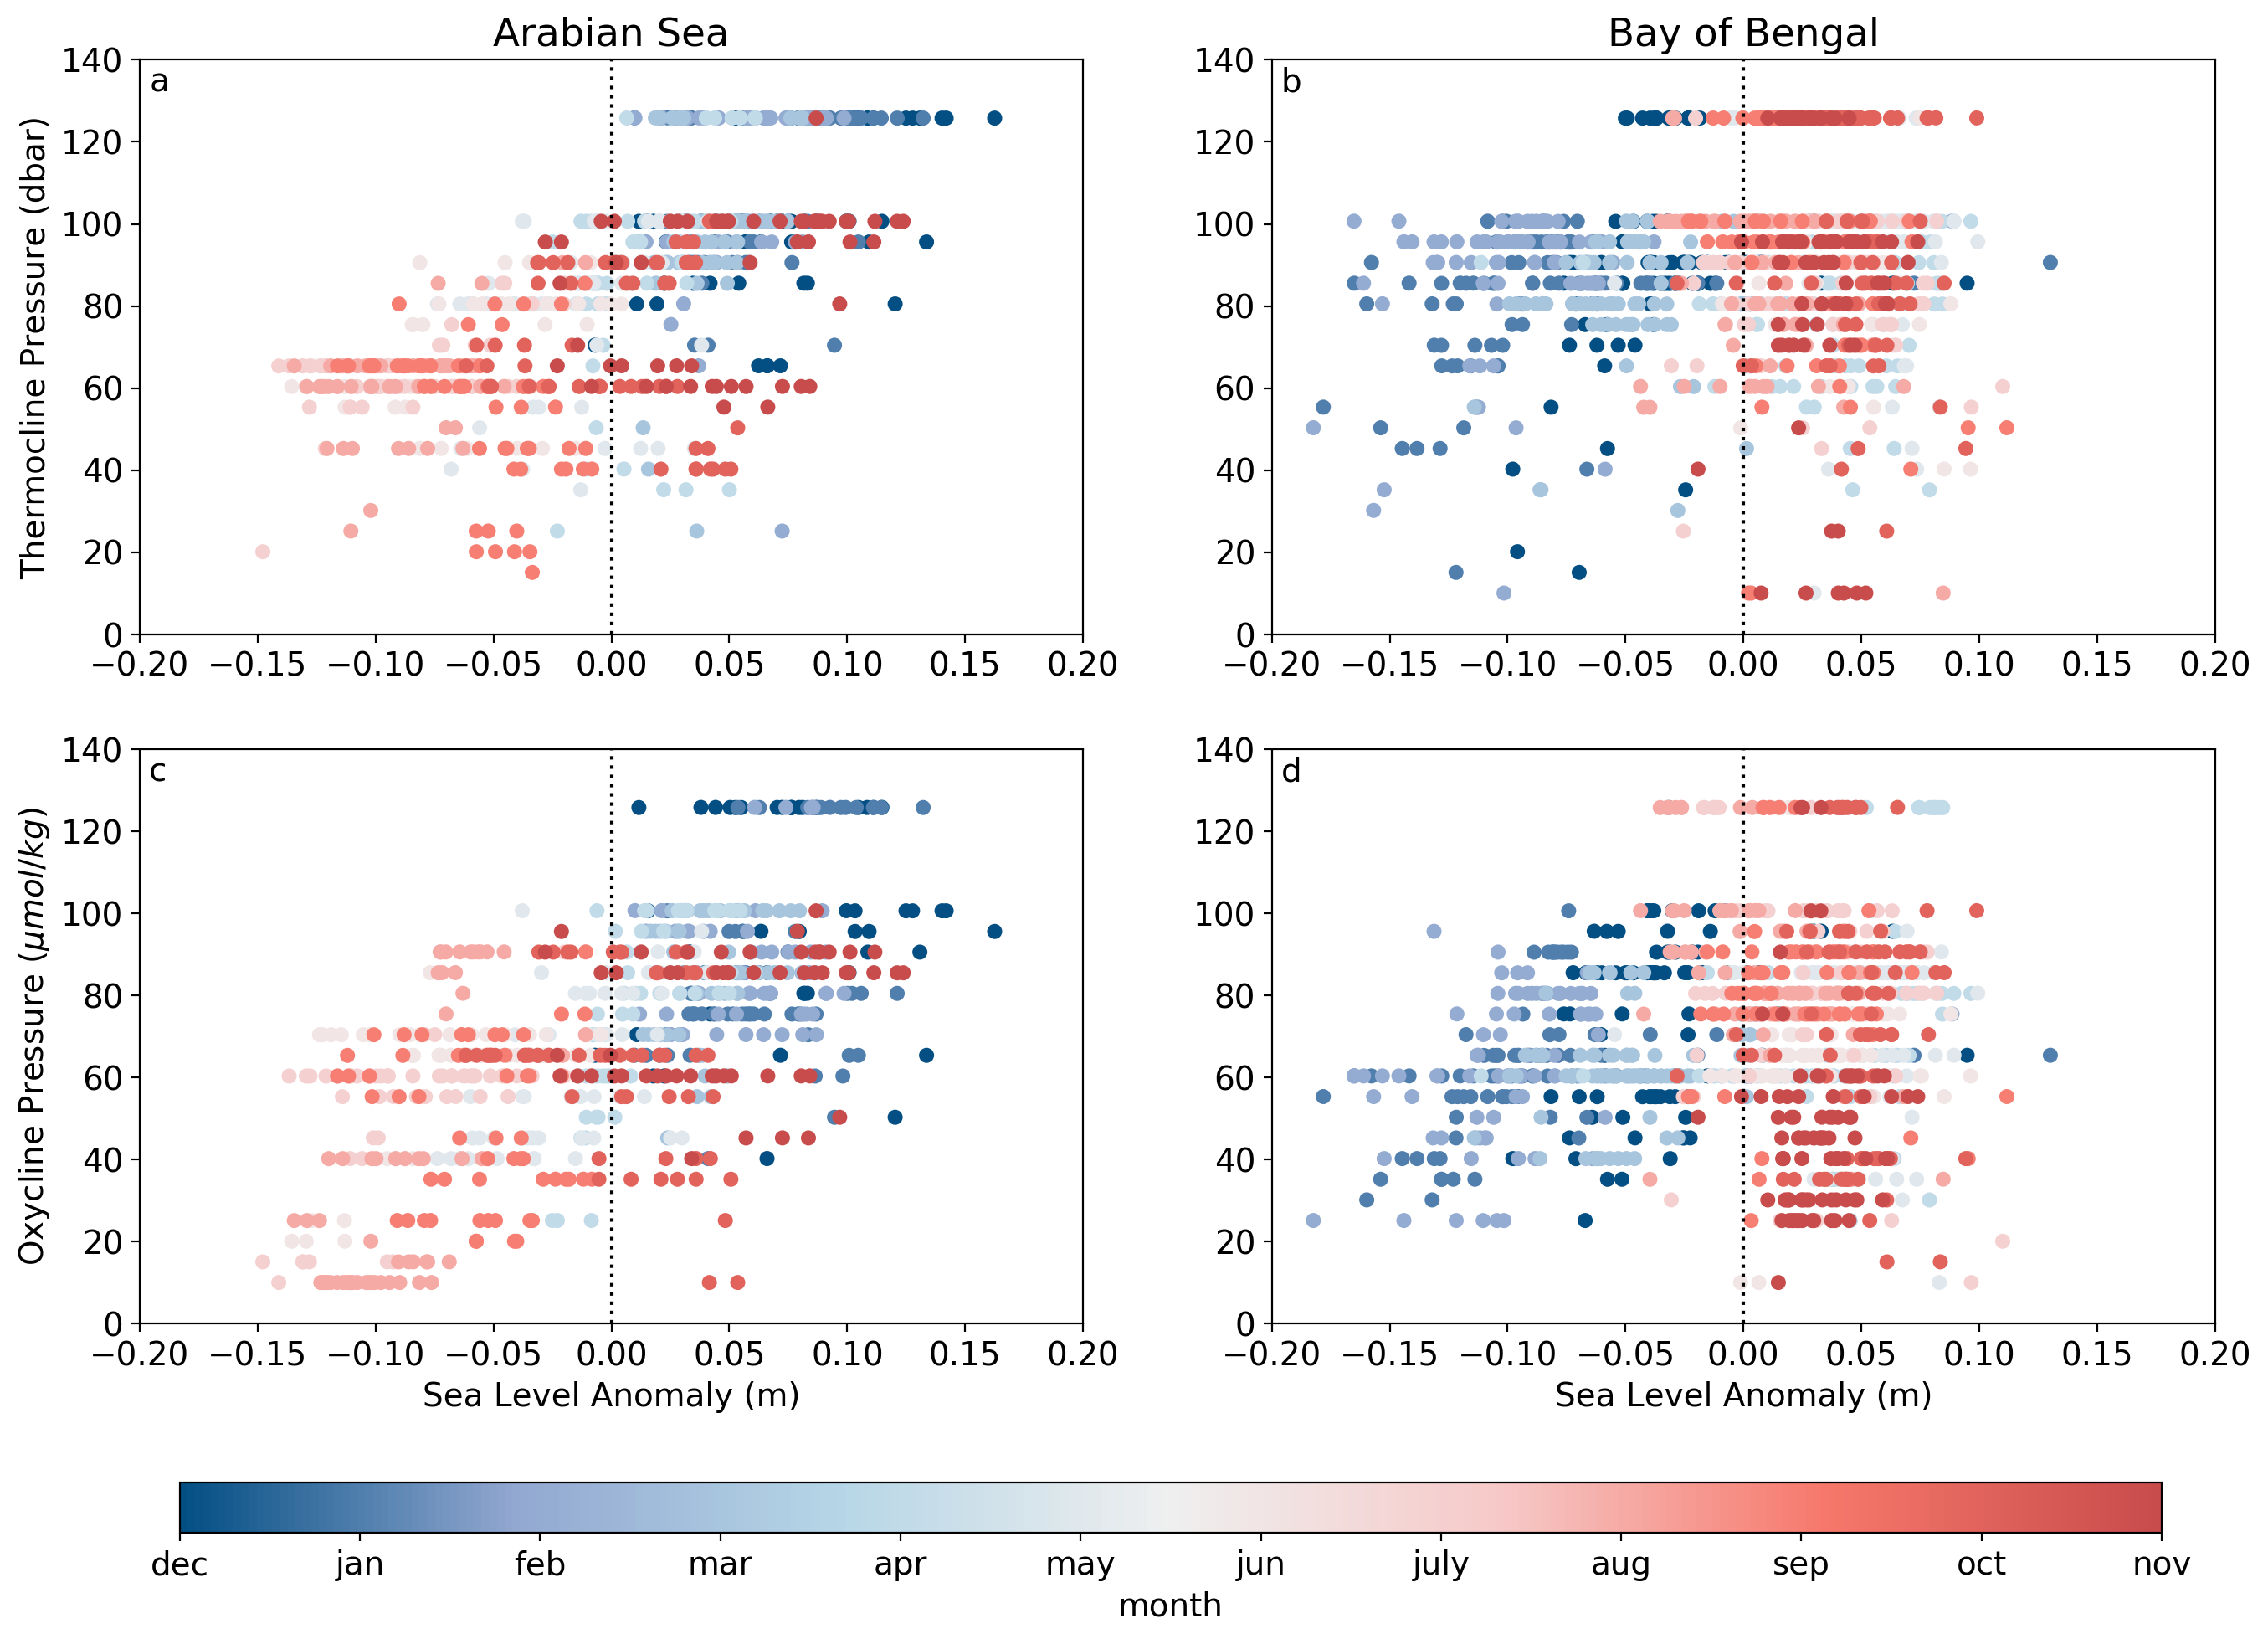

In [49]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(16,10),dpi=200)
sz = 30

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


plt.rcParams.update({'font.size': 14})

##############################################################

ax = axes[0,0]
p = ax.scatter(sla_AS,tcp_AS,c = mon_AS,s= sz,cmap=cmap)
ax.axvline(x=0,color = 'k',linestyle = ':')
ax.set_xlim([-0.2,0.2])
ax.set_ylim([0,140])
# ax.set_xlim([0,140])


ax.set_title('Arabian Sea')
ax.set_ylabel('Thermocline Pressure (dbar)')
add_letter(ax, 'a')

ax = axes[0,1]
p = ax.scatter(sla_BoB,tcp_BoB,c = mon_BoB,s= sz,cmap=cmap)
ax.axvline(x=0,color = 'k',linestyle = ':')
ax.set_xlim([-0.2,0.2])
ax.set_ylim([0,140])
ax.set_title('Bay of Bengal')
add_letter(ax, 'b')

ax = axes[1,0]
p = ax.scatter(sla_AS,ocp_AS,c = mon_AS,s= sz,cmap=cmap)
ax.axvline(x=0,color = 'k',linestyle = ':')
ax.set_xlim([-0.2,0.2])
ax.set_ylim([0,140])
ax.set_ylabel('Oxycline Pressure ($\mu mol /kg$)')
ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'c')

ax = axes[1,1]
p = ax.scatter(sla_BoB,ocp_BoB,c = mon_BoB,s= sz,cmap=cmap)
ax.axvline(x=0,color = 'k',linestyle = ':')
ax.set_xlim([-0.2,0.2])
ax.set_ylim([0,140])
ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'd')

mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, 0, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')


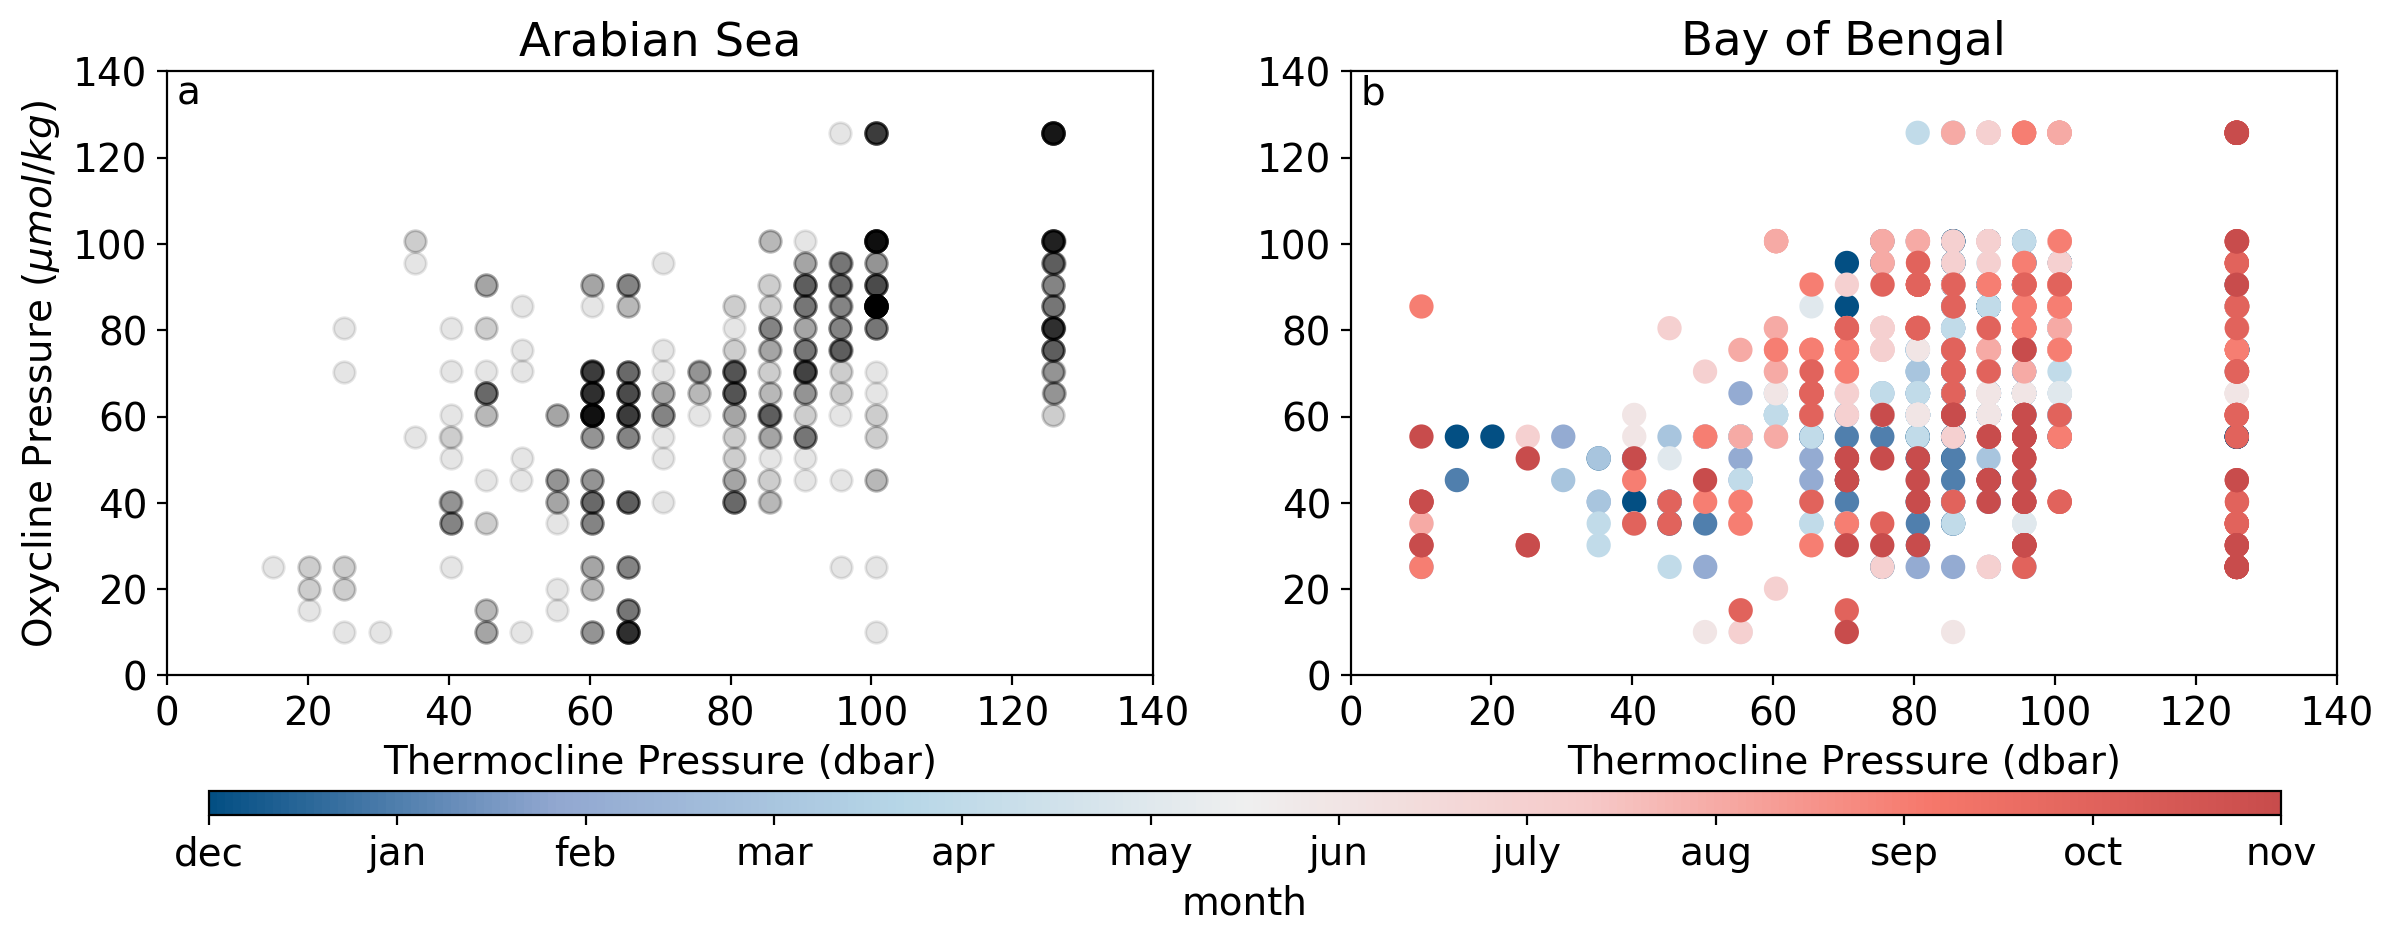

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(14,4),dpi=200)
sz = 60

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


plt.rcParams.update({'font.size': 14})

##############################################################

ax = axes[0]
p = ax.scatter(tcp_AS,ocp_AS,c = 'k',s= sz,cmap=cmap, alpha = 0.1)
ax.set_xlim([0,140])
ax.set_ylim([0,140])
ax.set_title('Arabian Sea')
ax.set_ylabel('Oxycline Pressure ($\mu mol /kg$)')
ax.set_xlabel('Thermocline Pressure (dbar)')
add_letter(ax, 'a')

ax = axes[1]
p = ax.scatter(tcp_BoB,ocp_BoB,c = mon_BoB,s= sz,cmap=cmap)
ax.set_xlim([0,140])
ax.set_ylim([0,140])
ax.set_title('Bay of Bengal')
ax.set_xlabel('Thermocline Pressure (dbar)')
add_letter(ax, 'b')


mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

cbar_ax = fig.add_axes([0.14, -0.05, 0.74, 0.03])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                         ticks = np.arange(1,13))
cbar.set_ticklabels(mon_title)
cbar.set_label('month')



In [27]:
tcp_BoB[~np.isnan(tcp_BoB)].shape

(1044,)

In [26]:
ocp_BoB[~np.isnan(ocp_BoB)].shape

(1044,)

In [28]:
sla_BoB[~np.isnan(sla_BoB)].shape

(1356,)

In [23]:
tcp_AS

array([100.62666321, 100.62666321, 125.79006958, 100.61317444,
       125.79006958, 125.79006958, 125.79006958, 100.62666321,
       125.79006958, 125.79006958, 125.79006958,  95.59667969,
        95.59667969, 125.79006958, 125.79006958, 125.79006958,
       125.79006958,          nan, 125.80355835, 125.80355835,
       125.80355835, 100.64014435, 125.80355835, 125.80355835,
       125.80355835, 100.64014435, 100.64014435, 125.80355835,
        95.61016083, 100.64014435, 100.64014435, 100.64014435,
       100.64014435,  85.55019379, 100.65363312, 100.65363312,
        80.52021027,  85.55019379, 100.65363312, 100.65363312,
                nan,  80.52021027,  85.55019379, 100.65363312,
       100.65363312,  80.52021027,  85.56368256,  85.56368256,
       100.66712189,  95.63713074,  85.56368256,  95.63713074,
        95.63713074,  65.43025208,  65.43025208,  70.47372437,
        95.65061951,  65.43025208,  65.43025208,          nan,
       100.62666321, 100.62666321, 100.61317444, 100.61

In [24]:
ocp_AS

array([100.62666321, 125.79006958, 125.79006958, 125.79006958,
       100.62666321, 100.62666321, 125.79006958, 125.79006958,
        95.59667969, 100.62666321, 100.62666321,  95.59667969,
       125.79006958, 100.62666321,  90.56669617,  95.59667969,
        90.56669617,          nan, 125.80355835, 125.80355835,
        95.59667969,  80.5067215 , 125.80355835, 125.80355835,
       125.80355835, 125.80355835, 125.80355835, 125.80355835,
        65.41677094,  60.38678741, 125.81703949, 125.81703949,
       125.81703949,  60.38678741, 125.81703949, 125.81703949,
        50.32681656,  75.49022675,  95.6236496 , 100.65363312,
                nan,  70.46024323,  75.49022675,  80.52021027,
        85.55019379,  70.46024323, 100.66712189,  80.52021027,
       100.66712189,  95.63713074,  80.53369141,  70.46024323,
        85.56368256,  85.56368256,  65.43025208,  65.43025208,
        90.60714722,  85.56368256,  40.2668457 ,          nan,
       100.62666321,  65.40328217, 125.79006958,  95.59